<a href="https://colab.research.google.com/github/RJKool/Sales-Predections/blob/main/Project_1_Week_3_CORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MOUNT DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
# IMPORT LIBRARIES
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
#LOAD DATASET
df = pd.read_csv("/content/drive/MyDrive/02-WEEK_2/sales_predictions.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
#Checking for duplicates
df.duplicated().sum()  #No duplicates found.

0

In [24]:
#There are a lot of columns to manually type their .value_counts().  I'm going to write a loop to do it for me.
df_keys = df.keys()  #Getting key name into a list format to iterate within for loop.

count = 0
for x in df_keys:
  print( f"COLUMN: {x}" )
  print( df[df_keys[count]].value_counts() )
  print()
  count += 1

COLUMN: Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

COLUMN: Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

COLUMN: Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

COLUMN: Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

COLUMN: Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                

In [26]:
#Replacing inconsistent data found in column "Item_Fat_Content" where extra categories "LF", "low fat", and "reg" were found.
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg", "Regular")
#Verifying values in column "Item_Fat_Content" after modifications.
display( df["Item_Fat_Content"].value_counts() )  #Categories look to be properly adjusted.
print()

#Continuing check of dataframe columns.
df["Item_Visibility"].value_counts()  #Possible inconsistent data found where 526 instances of 0.000000 were found.
#Replacing inconsistent data found in "Item_Visibility" where 0 will be replaced with the average of column "Item_Visibility"
avg_vis = df["Item_Visibility"].mean()
df["Item_Visibility"] = df["Item_Visibility"].replace(0, avg_vis)
#Verifying values in column "Item_Visibility" after modifications.
display( df["Item_Visibility"].value_counts() )
print()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

0.066132    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [30]:
#Filling all NaN "not a number" entries in the "Item_Weight" column with the average of "Item_Weight" column.
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)
display( df.isna().sum() )  #Checking the sum of NaN in all columns of df after modification
print()

display( df["Outlet_Size"].value_counts() )  #There are more Medium size outlets in the data set.  I will fill all NaN in the "Outlet_Size" column with Medium.
df["Outlet_Size"].fillna("Medium",inplace=True)
display( df.isna().sum() )  #Checking the sum of NaN in all columns of df after modification

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#What is a Histogram?
* Bars used to represent continous data and the intervals within it.

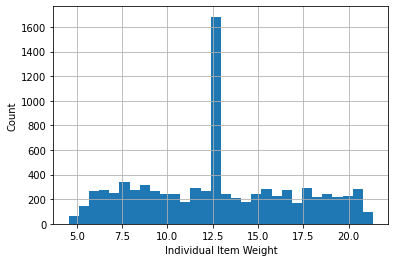

In [42]:
#Plotting histogram with Pandas
df["Item_Weight"].hist(bins=30);
plt.xlabel("Individual Item Weight");
plt.ylabel("Count");

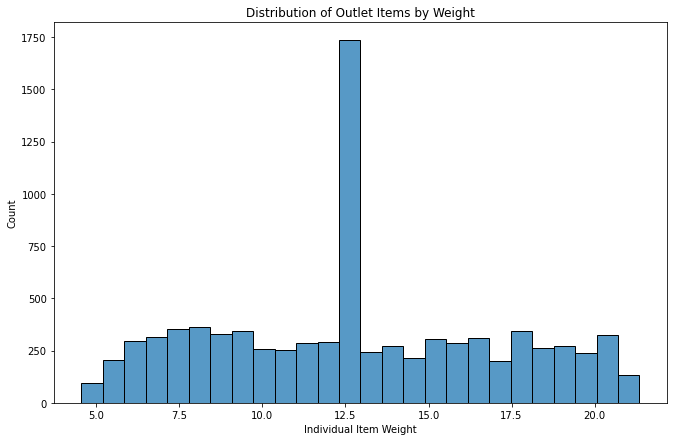

In [48]:
#Plotting histogram with Seaborn
plt.figure(figsize = (11,7))

my_graph = sns.histplot(data = df, x = "Item_Weight");

my_graph.set(title = "Distribution of Outlet Items by Weight");

plt.xlabel("Individual Item Weight");
plt.ylabel("Count");

#What is a Boxplot?
* Box plots are used to in statistics to graphically display various parameters at a glance.
* In a boxplot the median, interquartile range, and outliers can be read.
* The data must have metric scale level.
* The boxplot is often created to compare and contrast two or more groups.

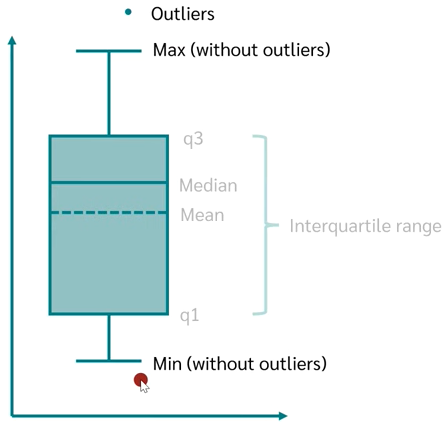

* The box indicates the range in which the middle 50% of all data lies.  This box represents 50% of all data points.
* Thus the lower end of the box is the 1st quartile and the upper end is the 3rd quartile.  Therefore, 25% of your data is below **q1** and 25% of your data is above **q3**.
* Between q1 and q3 (the box) is the interquartile range.
* Inside the box, the solid line is the median of the entire data range.  And the and the dotted line is the mean of the entire data range.
* The T-shaped whiskers go tot hte last point (min or max) of your data range.  Which is still within 1.5 times the interquartile range.  If a datapoint falls outside the maximum of 1.5 times the interquartile range, it's considered an **outlier** and is plotted as a dot.



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


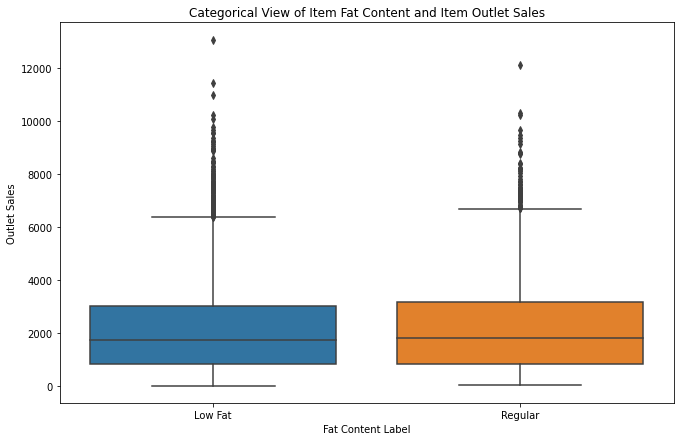

In [68]:
display(df.head())

plt.figure(figsize = (11,7))

my_graph = sns.boxplot(data = df, x="Item_Fat_Content", y="Item_Outlet_Sales");
#my_graph = sns.boxplot(data = df, x="Item_Visibility");

my_graph.set(title = "Categorical View of Item Fat Content and Item Outlet Sales");

plt.xlabel("Fat Content Label");
plt.ylabel("Outlet Sales");

#What is a heatmap?
* A visual\graphical a graphical representation of data where values are depicted by color.  We will calculate the correlations of datasets\dataframes, then create a heatmap to visualize the correlations.

Using **df.corr()** method finds the correlation of data.

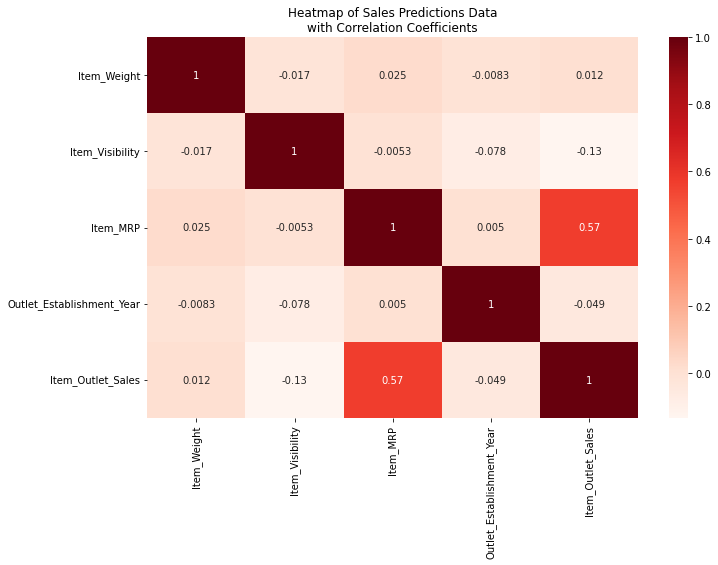

In [77]:
# Finding the correlation of all data in the Sales Predictions dataframe.
df_correlations = df.corr()

plt.figure(figsize = (11,7))

my_graph = sns.heatmap(df_correlations, cmap="Reds", annot=True);

my_graph.set(title = "Heatmap of Sales Predictions Data\nwith Correlation Coefficients");

The above heatmaps shows there is only one moderate positive correlation between item price (Item_MRP) and the number of items sold (Item_Outlet_Sales).

In general a correlation coefficient greater than 0.7 is considered "strong."

Between 0.5 and 0.7 is considered "moderate".

Between 0.3 and 0.5 is considered a "low" correlation.

***However, these rules of thumb can vary between content areas!***